<a href="https://colab.research.google.com/github/NazihaCode/API_predict_purchase/blob/master/Machine_Learning_Purchase.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Nouvelle section

In [ ]:
import pandas as pd
import numpy as np
# Label Encoding
from sklearn.preprocessing import LabelEncoder
le=LabelEncoder()


In [ ]:
!wget https://storage.googleapis.com/datasetsbyali/Social_Network_Adata.csv #Download on Local

In [ ]:
from google.colab import drive
drive.mount('/content/drive', force_remount=True )


Mounted at /content/drive


In [ ]:
cd '/content/drive/MyDrive/'


/content/drive/MyDrive


In [ ]:
import data

In [ ]:
#data= pd.read_csv("https://storage.googleapis.com/datasetsbyali/Social_Network_Adata.csv")
data= pd.read_csv("data/Social_Network_Ads.csv")
data.head()

,User ID,Gender,Age,EstimatedSalary,Purchased
0,15624510,Male,19,19000,0
1,15810944,Male,35,20000,0
2,15668575,Female,26,43000,0
3,15603246,Female,27,57000,0
4,15804002,Male,19,76000,0


In [ ]:
data['Purchased'].unique() #check if Classification or Regression!

array([0, 1])

# Classification Problem
### "Purchased" column has ony 2 unique values, so it is basically Binary Classification problem

In [ ]:
data.info() #check for null values

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 400 entries, 0 to 399
Data columns (total 5 columns):
 #   Column           Non-Null Count  Dtype 
---  ------           --------------  ----- 
 0   User ID          400 non-null    int64 
 1   Gender           400 non-null    object
 2   Age              400 non-null    int64 
 3   EstimatedSalary  400 non-null    int64 
 4   Purchased        400 non-null    int64 
dtypes: int64(4), object(1)
memory usage: 15.8+ KB


In [ ]:

#transforming non numerical labels to numeric labels
data['Gender']=le.fit_transform(data['Gender'])

In [ ]:
data.head(5)

,User ID,Gender,Age,EstimatedSalary,Purchased
0,15624510,1,19,19000,0
1,15810944,1,35,20000,0
2,15668575,0,26,43000,0
3,15603246,0,27,57000,0
4,15804002,1,19,76000,0


In [ ]:
data['Gender'].unique()
# Only two unique values, so need of One Hot Encoding

array([1, 0])

In [ ]:
#we are seperating x and y values using iloc[]
x=data.iloc[:,1:4].values
y=data.iloc[:,4].values

In [ ]:
x.shape

(400, 3)

# Nouvelle section

# Nouvelle section

In [ ]:
# Splitting the data
from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.2)
x_train.shape

(320, 3)

## StandardScaler 

 It transforms the data in such a manner that it has mean as 0 and standard deviation as 1. In short, it standardizes the data. Standardization is useful for data which has negative values. It arranges the data in a standard normal distribution.

## let's verify this with an example;

In [ ]:
from sklearn.preprocessing import StandardScaler
import numpy as np

 #4 samples/observations and 2 variables/features
data = np.array([[0,0] , [1,0] , [0,1] , [1,1]])
scaler =StandardScaler()
scaled_data = scaler.fit_transform(data)

print(data)
print(scaled_data)

[[0 0]
 [1 0]
 [0 1]
 [1 1]]
[[-1. -1.]
 [ 1. -1.]
 [-1.  1.]
 [ 1.  1.]]


In [ ]:
x_train = scaler.fit_transform(x_train)
x_test = scaler.fit_transform(x_test)

In [ ]:
!pip install sklearn


Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
  Preparing metadata (setup.py) ... done
  Created wheel for sklearn: filename=sklearn-0.0.post1-py3-none-any.whl size=2344 sha256=21c1cde92f02f60108e7f159c6fb19ede3a3484be1eaf4657971507d7e723b37
  Stored in directory: /root/.cache/pip/wheels/14/25/f7/1cc0956978ae479e75140219088deb7a36f60459df242b1a72
Successfully built sklearn


In [ ]:
#Verify that the mean of each feature (column) is 0:
scaled_data.mean(axis=0)


array([0., 0.])

In [ ]:
#Verify that the std of each feature (column) is 1:
scaled_data.std(axis=0)


array([1., 1.])

In [ ]:
# Feature Scaling


In [ ]:
# Training the model using Decision Tree Classifier
from sklearn.tree import DecisionTreeClassifier
dtc=DecisionTreeClassifier(criterion='entropy',random_state=42)
dtc.fit(x_train,y_train)

DecisionTreeClassifier(criterion='entropy', random_state=42)

In [ ]:
y_pred=dtc.predict(x_test)

In [ ]:
# Getting the Accuracy Score
from sklearn.metrics import accuracy_score
accuracy_score(y_test,y_pred)

0.8625

<AxesSubplot:xlabel='Actual', ylabel='Predicted'>

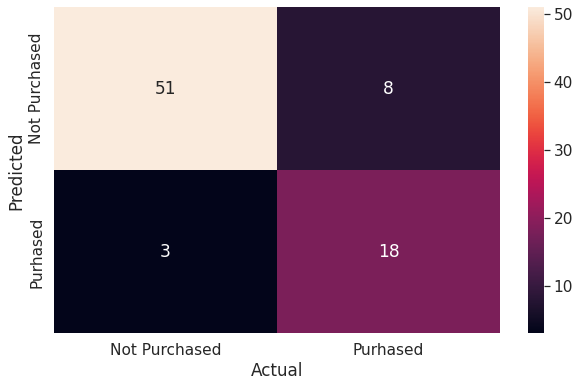

In [ ]:
labels = ["Not Purchased", "Purhased"]
# Confusion Matrix
from sklearn.metrics import confusion_matrix
import seaborn as sns
import matplotlib.pyplot as plt


df_cm = pd.DataFrame(confusion_matrix(y_test,y_pred), columns=labels, index= labels)
df_cm.index.name ='Predicted'
df_cm.columns.name = 'Actual'
plt.figure(figsize = (10,6))
sns.set(font_scale=1.4)#for label size
sns.heatmap(df_cm, annot=True,annot_kws={"size": 17})

## ROC Curve
Receiver Operating Characteristic curve. It is nothing but a graph displaying the performance of a classification model. It is a very popular method to measure the accuracy of a classification model.



The ROC curve is created by plotting the true positive rate (TPR) against the false positive rate (FPR) at various threshold settings.

In [ ]:
# Getting the roc
import sklearn.metrics as metrics   # to measure classification performance.
fpr,tpr,threshold=metrics.roc_curve(y_test,y_pred)
roc_auc=metrics.auc(fpr,tpr)

Text(0.5, 0, 'fpr')

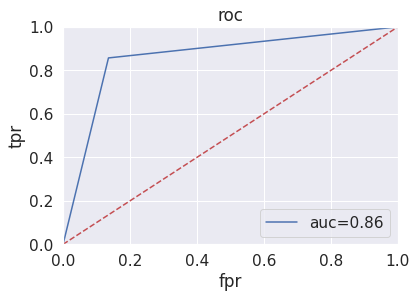

In [ ]:
# Plotting the roc-auc curve
import matplotlib.pyplot as plt
plt.title("roc")
plt.plot(fpr,tpr,'b',label="auc=%0.2f"%roc_auc)
plt.legend(loc="lower right") #automatically creates a legend for labeled plot elements
plt.plot([0,1],[0,1],"r--")
plt.xlim([0,1])  #Get or set the x limits of the current axes.
plt.ylim([0,1])  #Get or set the y limits of the current axes.
plt.ylabel("tpr")
plt.xlabel("fpr")

In [ ]:
# Prediction for demo data 
dtc.predict(scaler.fit_transform([[1,34,1900]]))

array([1])

In [ ]:
!pip install sklearn

In [ ]:
from sklearn.ensemble import RandomForestClassifier

from sklearn.metrics import fbeta_score, make_scorer # make_scorer takes a score function, and returns a callable that scores a classifier's output.
#F-beta score is for the positive class in binary classification

#from sklearn.model_selection import GridataearchCV

model = RandomForestClassifier()

# optimised model

**Our optimized Random Forest model is:**

```
RandomForestClassifier(bootstrap=True, ccp_alpha=0.0, class_weight=None,
                       criterion='gini', max_depth=5, max_features='auto',
                       max_leaf_nodes=None, max_samples=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=8, min_samples_split=3,
                       min_weight_fraction_leaf=0.0, n_estimators=4,
                       n_jobs=None, oob_score=False, random_state=None,
                       verbose=0, warm_start=False)
```




In [ ]:
model.fit(x_train, y_train)

RandomForestClassifier()

In [ ]:
y_pred = model.predict(x_test)

In [ ]:
# Conclude that 0 is Not Purchased and 1 is vice versa
from sklearn.metrics import confusion_matrix, accuracy_score, classification_report

labels = ["Not Purchased", "Purhased"]

y_pred=model.predict(x_test)
report = classification_report(y_test, y_pred, target_names=labels)
print(report)

               precision    recall  f1-score   support

Not Purchased       0.95      0.90      0.92        59
     Purhased       0.75      0.86      0.80        21

     accuracy                           0.89        80
    macro avg       0.85      0.88      0.86        80
 weighted avg       0.89      0.89      0.89        80



<AxesSubplot:>

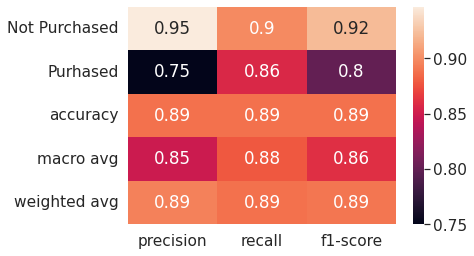

In [ ]:
import seaborn as sns

classes = ["Not Purchased", "Purhased"]

classificationReport= classification_report(y_test, y_pred, target_names=classes, output_dict=True)

sns.heatmap(pd.DataFrame(classificationReport).iloc[:-1, :].T, annot=True)


Note:

`'macro':`

Calculate metrics for each label, and find their unweighted mean. This does not take label imbalance into account.

`'weighted'`:
'weighted':
Calculate metrics for each label, and find their average weighted by support (the number of true instances for each label). This alters ‘macro’ to account for label imbalance; it can result in an F-score that is not between precision and recall.

`'Recall'`:
Note: A model that produces no false negatives has a recall of 1.0.


Improving precision typically reduces recall and vice versa.

## Let's plot the Confusion matrix

<AxesSubplot:xlabel='Predicted', ylabel='Actual'>

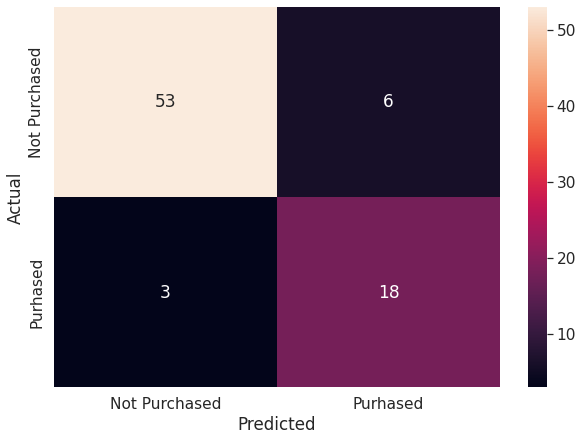

In [ ]:
import seaborn as sns
import matplotlib.pyplot as plt


df_cm = pd.DataFrame(confusion_matrix(y_test,y_pred), columns=labels, index= labels)
df_cm.index.name = 'Actual'
df_cm.columns.name = 'Predicted'
plt.figure(figsize = (10,7))
sns.set(font_scale=1.4)#for label size
sns.heatmap(df_cm, annot=True,annot_kws={"size": 17})

In [ ]:
# Getting the roc
import sklearn.metrics as metrics
fpr,tpr,threshold=metrics.roc_curve(y_test,y_pred)
roc_auc=metrics.auc(fpr,tpr)

Text(0.5, 0, 'fpr')

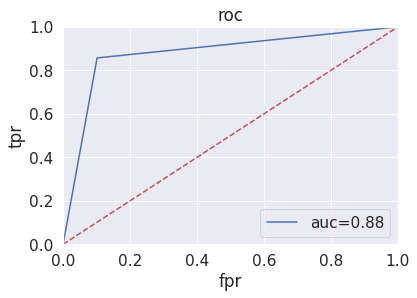

In [ ]:
# Plotting the roc-auc curve
import matplotlib.pyplot as plt
plt.title("roc")
plt.plot(fpr,tpr,'b',label="auc=%0.2f"%roc_auc)
plt.legend(loc="lower right")
plt.plot([0,1],[0,1],"r--")
plt.xlim([0,1])
plt.ylim([0,1])
plt.ylabel("tpr")
plt.xlabel("fpr")

## Before we deploy;

In [ ]:
# Import tools needed for visualization
from sklearn.tree import export_graphviz
import pydot
tree = model.estimators_[3]
features= ['Gender',	'Age',	'Estimatedataalary']

# Export the image to a dot file
export_graphviz(tree, out_file = 'tree.dot', feature_names = features, rounded = True, precision = 1)

# Use dot file to create a graph
(graph, ) = pydot.graph_from_dot_file('tree.dot')

# Write graph to a png file
graph.write_png('tree.png')

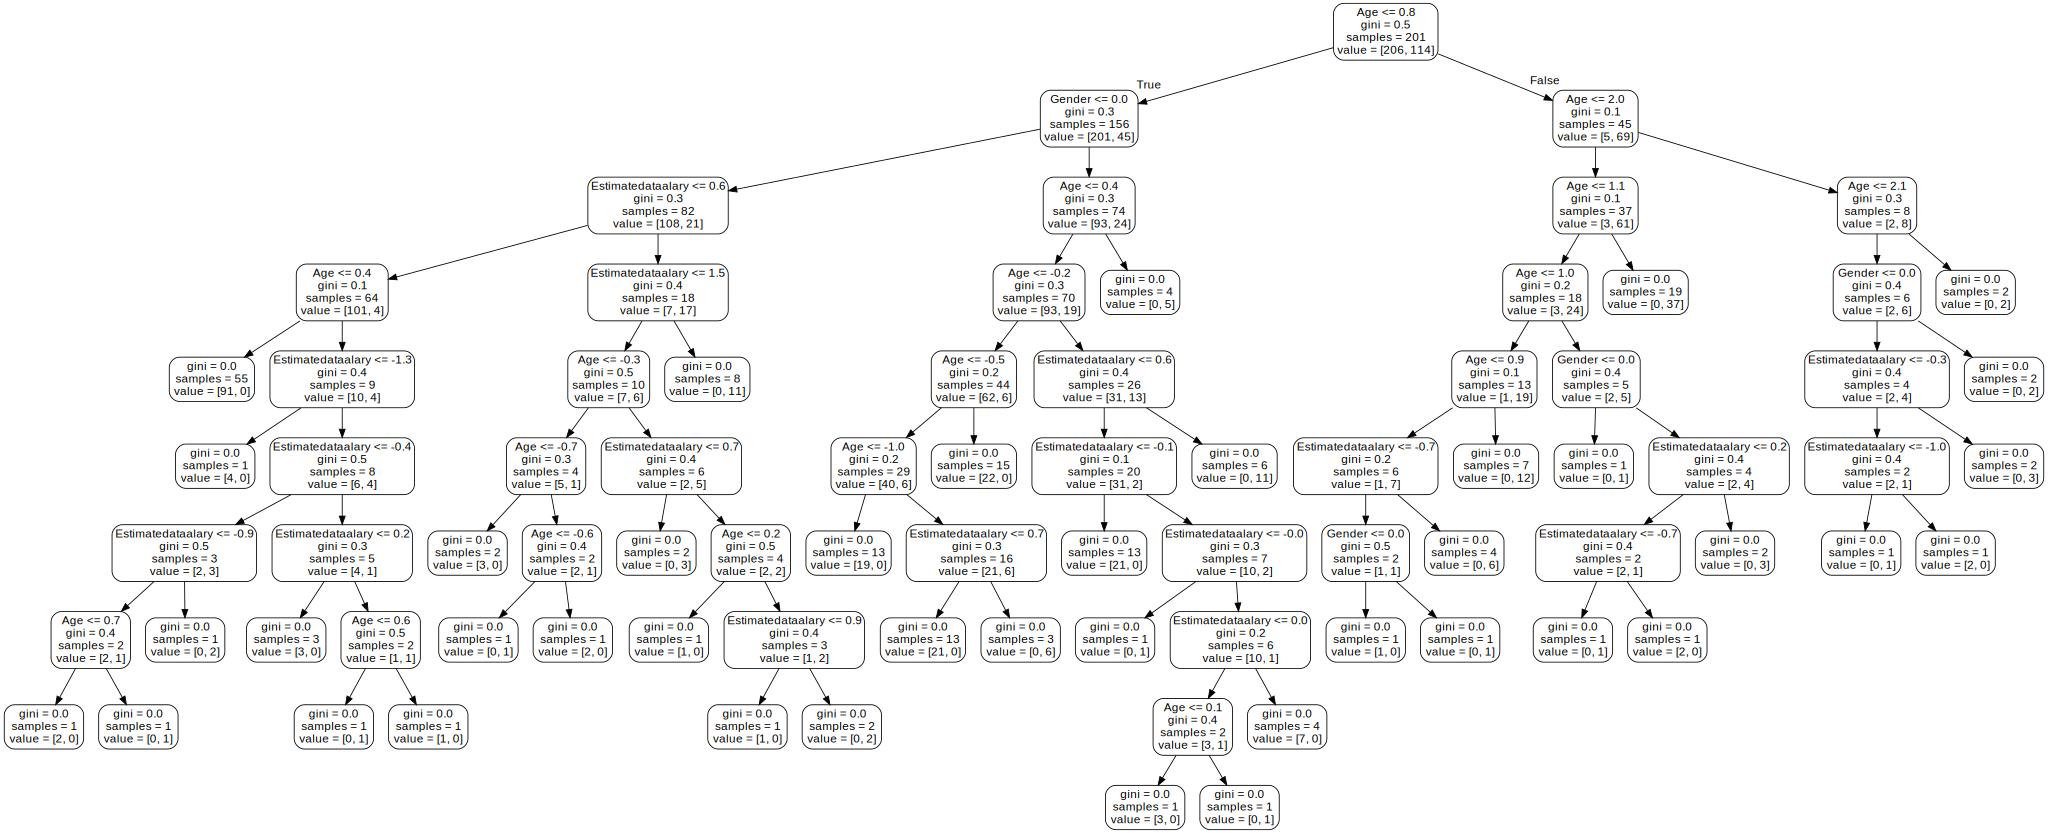

In [ ]:
import graphviz
with open("tree.dot") as f:
    dot_graph = f.read()
graphviz.Source(dot_graph)

# Saving Model

In [ ]:
# Exporting model
import pickle
pickle.dump(model,open('model.pkl','wb'))

In [ ]:
# Import & Predict
model=pickle.load(open('model.pkl','rb'))
model.predict(scaler.fit_transform([[1,32,2700]]))

array([0])

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

**Where 0 is Not Purchased** 

**And 1 is Purchased**

## Let's Deploy our model!

We technically need a server to deploy our application, we are using is a free VM provided by Google.

We can expose it to a public URL using ngrok and make API for our model using FLASK.

In [ ]:
!pip install flask-ngrok

In [ ]:
from flask import Flask, jsonify, make_response, request
from flask_ngrok import run_with_ngrok

app = Flask(__name__)
run_with_ngrok(app)

@app.route("/",methods=['Get'])
def putStatus():
  data = {"data": "Hello World"}
  return jsonify(data)
@app.route('/predict',methods=['POST'])
def predict():
  data = request.get_json(force=True)
  gender = str(data['Gender'])
  age = str(data['Age'])
  sal = str(data['Salary'])
  test = np.array([[gender,age,sal]])
  model=pickle.load(open('model.pkl','rb'))
  prediction = model.predict(scaler.fit_transform(test))
  output = prediction[0]
  if (output == 0):
    return "He/She's not gonna purchase it!"
  else :
    return "He/She's gonna purchase it!"
app.run()
